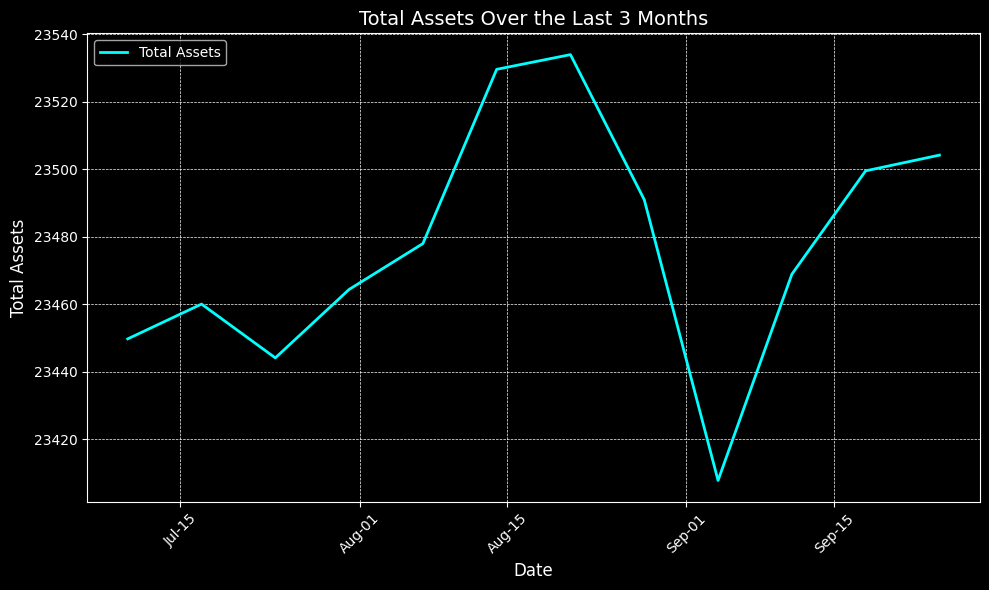

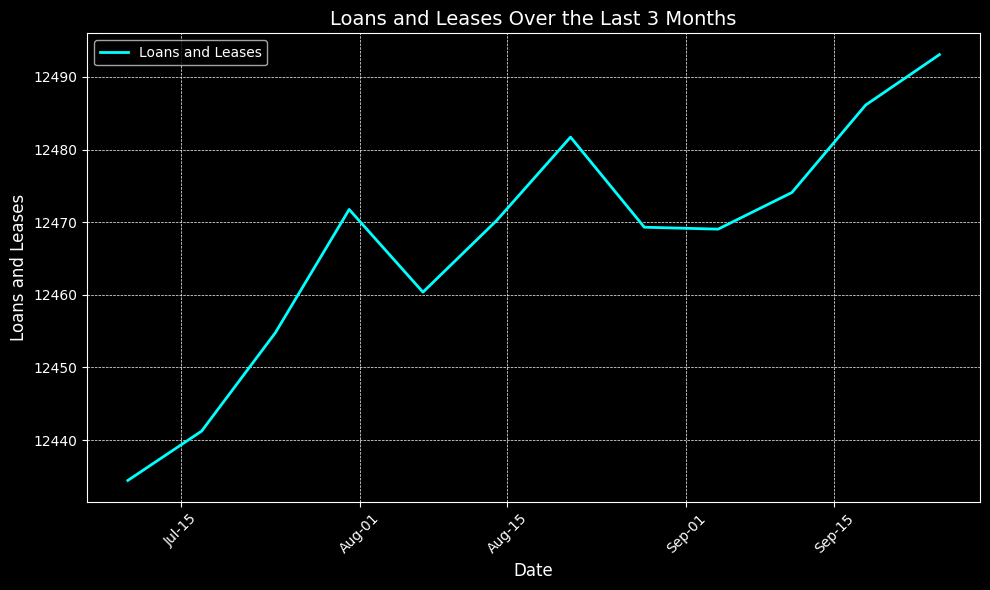

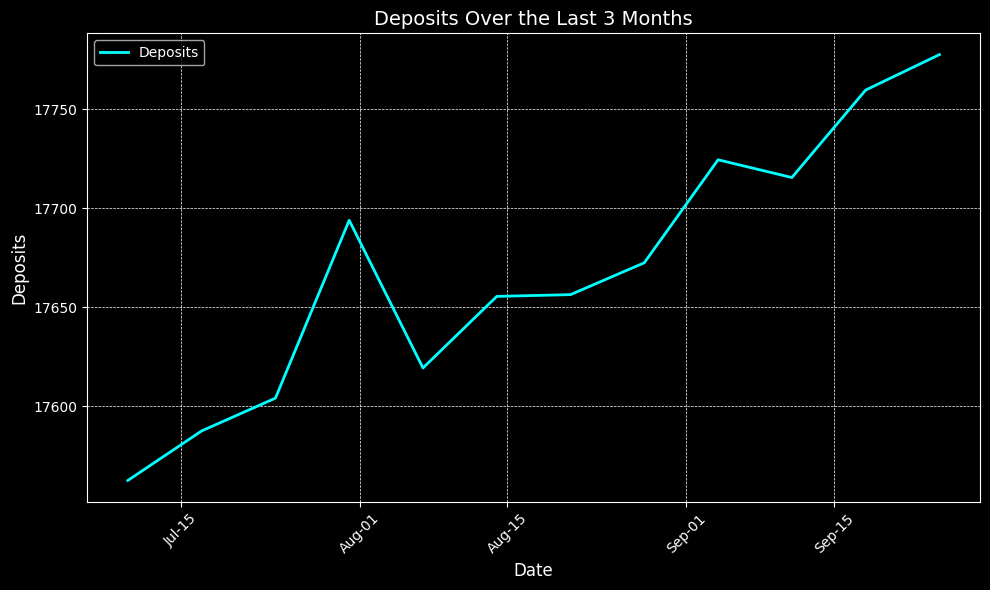

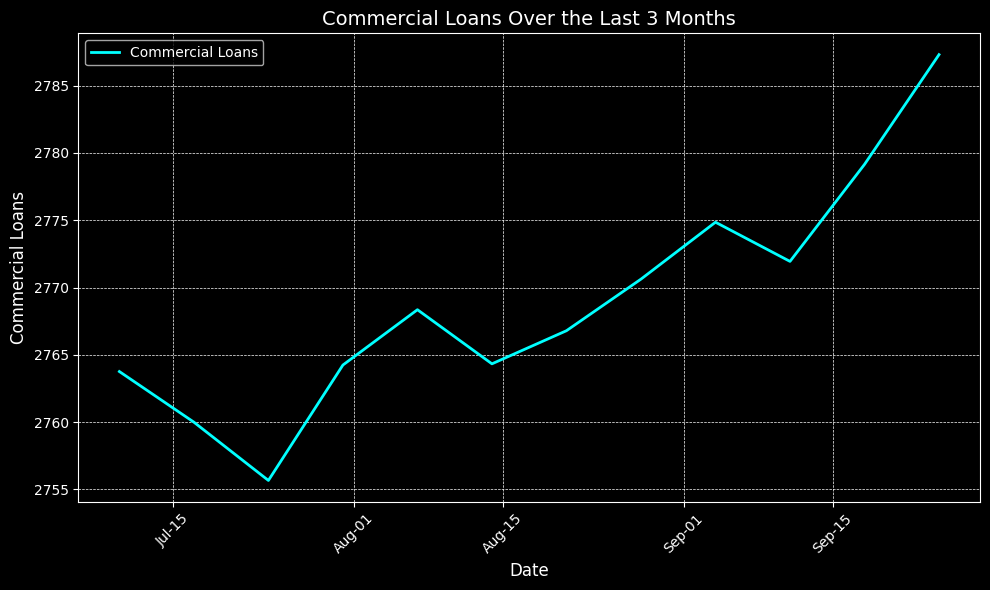

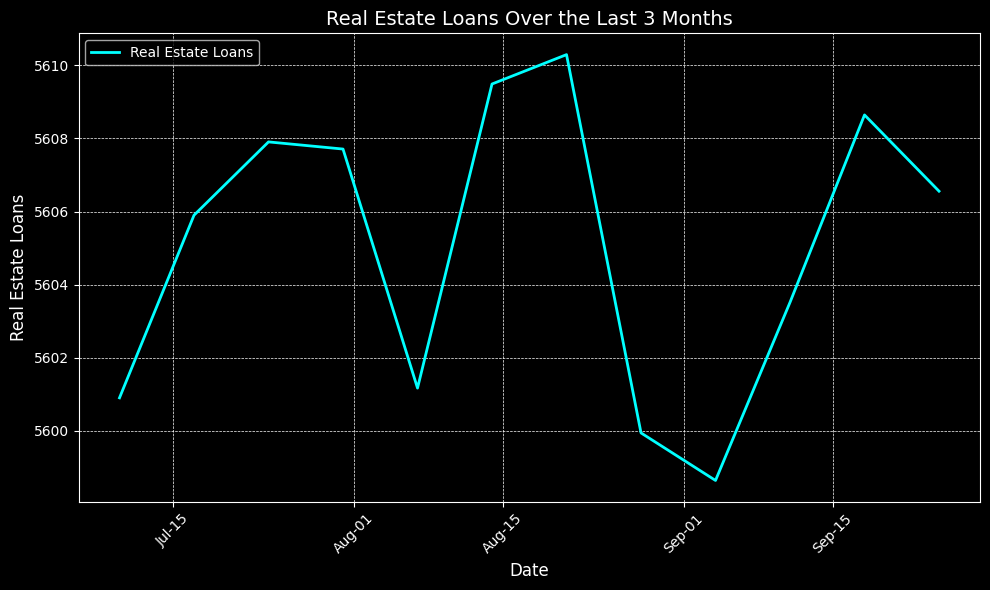

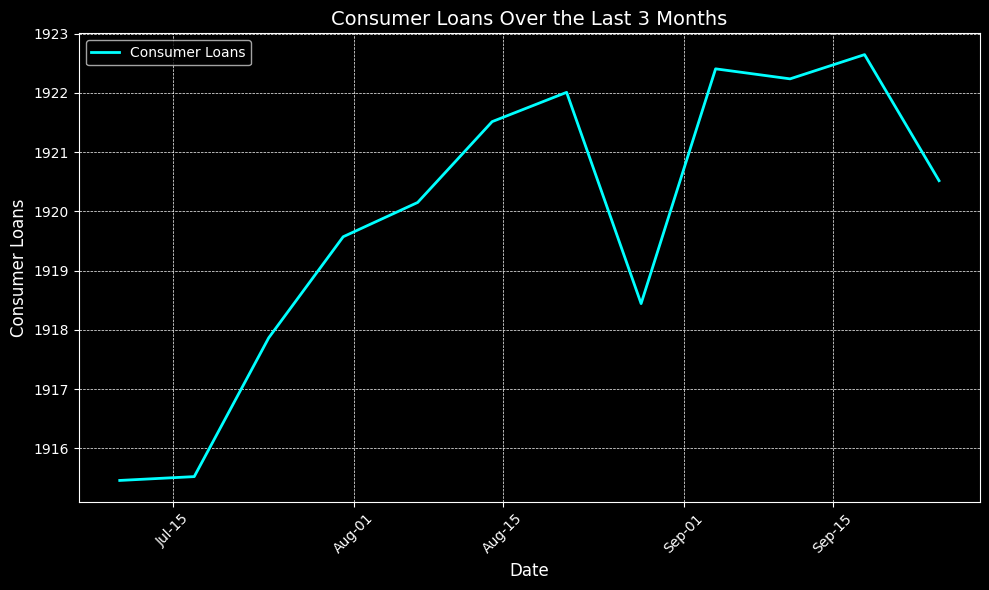

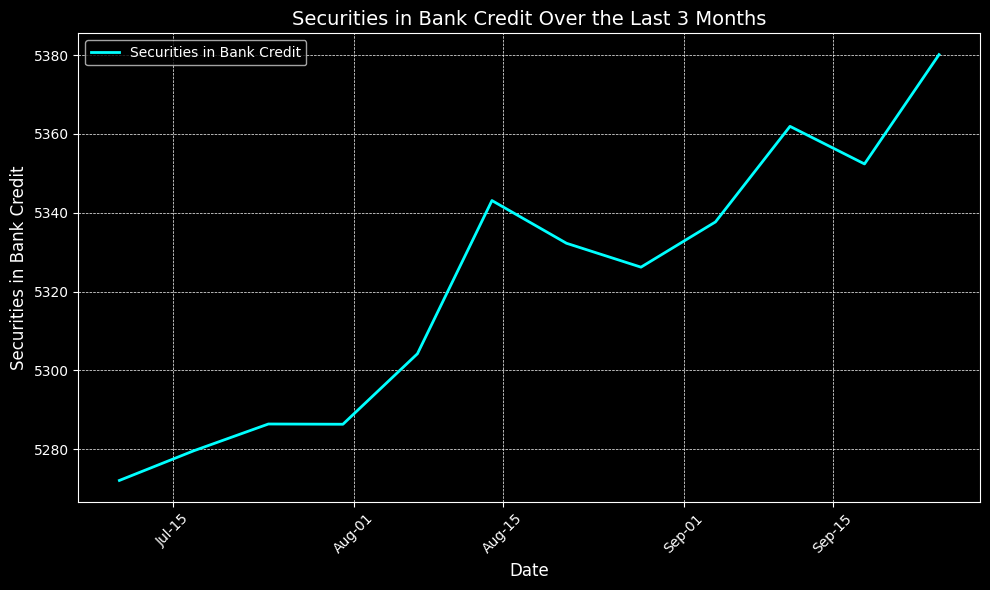

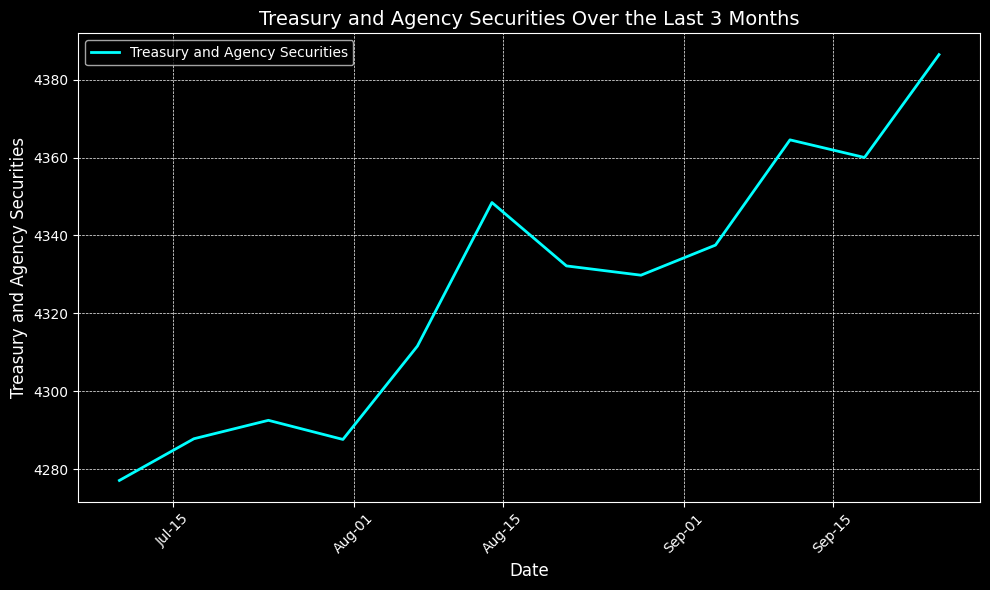

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from fredapi import Fred
from matplotlib.dates import DateFormatter

# Initialize FRED API with your API key
# Replace 'your_fred_api_key' with your actual API key
fred = Fred(api_key='495cd17849c9527846a6318bd3ecc94c')

# Define the series IDs for H8 data, including the new metrics
series_ids = {
    'Total Assets': 'TLAACBW027SBOG',
    'Loans and Leases': 'TOTLL',
    'Deposits': 'DPSACBW027SBOG',
    'Commercial Loans': 'TOTCI',
    'Real Estate Loans': 'RELACBW027SBOG',
    'Consumer Loans': 'CLSACBW027SBOG',
    'Securities in Bank Credit': 'SBCACBW027SBOG',
    'Treasury and Agency Securities': 'TASACBW027SBOG'
}

# Fetch the data for the past 3 months
three_months_ago = pd.Timestamp.today() - pd.DateOffset(months=3)
data = pd.DataFrame()

for label, series_id in series_ids.items():
    series_data = fred.get_series(series_id, observation_start=three_months_ago)
    data[label] = series_data

# Format index as DateTime
data.index = pd.to_datetime(data.index)

# Plotting the data with a black background for better visibility
plt.style.use('dark_background')

for column in data.columns:
    plt.figure(figsize=(10, 6))
    
    plt.plot(data.index, data[column], label=column, color='cyan', linewidth=2)
    
    # Formatting the plot
    plt.title(f'{column} Over the Last 3 Months', fontsize=14)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel(column, fontsize=12)
    plt.xticks(rotation=45)
    
    # Set date format on x-axis
    date_form = DateFormatter("%b-%d")
    plt.gca().xaxis.set_major_formatter(date_form)
    
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    
    # Show legend
    plt.legend(loc='upper left', fontsize=10)
    
    # Show plot
    plt.tight_layout()
    plt.show()

In [5]:
data

,Total Assets,Loans and Leases,Deposits,Commercial Loans,Real Estate Loans,Consumer Loans,Securities in Bank Credit,Treasury and Agency Securities
2022-10-12,22755.1966,11770.9890,17803.6949,2773.1794,5198.1114,1818.0339,5597.3789,4457.6945
2022-10-19,22773.0473,11782.7856,17796.6367,2770.3554,5208.3359,1820.8644,5581.9660,4445.0576
2022-10-26,22832.3273,11806.0681,17814.4284,2776.1462,5219.1994,1822.5608,5570.9004,4436.0167
2022-11-02,22745.6729,11828.2740,17727.2219,2781.4883,5228.7966,1824.1338,5539.6774,4407.1204
2022-11-09,22764.8663,11843.7278,17750.4422,2792.5687,5235.9673,1824.3025,5531.2781,4403.0635
...,...,...,...,...,...,...,...,...
2024-08-28,23490.9564,12469.3126,17672.5015,2770.6258,5599.9457,1918.4422,5326.1972,4329.8158
2024-09-04,23407.8024,12469.0506,17724.4595,2774.8563,5598.6456,1922.4052,5337.6810,4337.5321
2024-09-11,23468.8773,12474.0894,17715.5052,2771.9444,5603.5183,1922.2359,5361.9369,4364.5232
2024-09-18,23499.5071,12486.1355,17759.6362,2779.1528,5608.6444,1922.6450,5352.3952,4360.0050
